In [2]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score, recall_score, f1_score
import pickle



**NOTE** : Please enter Category Names same as folder name

In [3]:
Categories=['Cars','Ice cream cone','Cricket ball']


In [4]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir = 'C:\\Users\\Aman\\Desktop\\imageclassification'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Cars
loaded category:Cars successfully
loading... category : Ice cream cone
loaded category:Ice cream cone successfully
loading... category : Cricket ball
loaded category:Cricket ball successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,0.188032,0.175197,0.166019,0.266747,0.241835,0.178505,0.291546,0.246504,0.177794,0.292808,...,0.596285,0.600187,0.608046,0.605469,0.609391,0.620088,0.587750,0.591672,0.610687,0
2,0.763509,0.694619,0.616188,0.758216,0.691426,0.612994,0.759536,0.692393,0.613961,0.752903,...,0.430610,0.465547,0.454440,0.432553,0.468487,0.464213,0.432538,0.471438,0.474700,0
3,0.264764,0.269562,0.281013,0.283545,0.274633,0.279183,0.117344,0.106521,0.102887,0.067332,...,0.540330,0.515482,0.508428,0.555654,0.537145,0.526144,0.537862,0.519078,0.511778,0
4,0.125471,0.181245,0.050994,0.228965,0.296064,0.080535,0.216547,0.284783,0.084131,0.121300,...,0.292954,0.304718,0.230208,0.237886,0.242990,0.171810,0.154850,0.158772,0.088184,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
95,0.576470,0.658843,0.348981,0.576471,0.658844,0.348980,0.576903,0.659706,0.348552,0.579959,...,0.537094,0.589633,0.289939,0.569548,0.606358,0.315815,0.581344,0.607690,0.320310,2
96,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
97,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2


Splitting the data into training and testing data

In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [6]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Predicting our testing data

In [7]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1])

In [8]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1])

In [9]:

print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
confusion_matrix(y_pred,y_test)
precision = precision_score(y_test, y_pred, average='macro')

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

The model is 85.0% accurate
Precision: 0.8888888888888888
Recall: 0.8611111111111112
F1 Score: 0.8554112554112554


Using Pickle to save the model to disk

In [10]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


The Machine-Learning Based Model is Created Successfully. Now You can test for classification of any image which falls in the mentioned Categories

Testing of model :

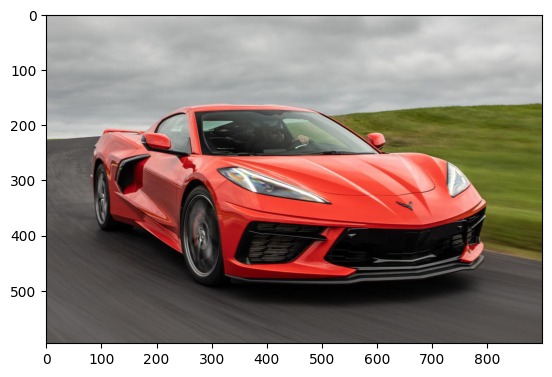

The predicted image is: Cars


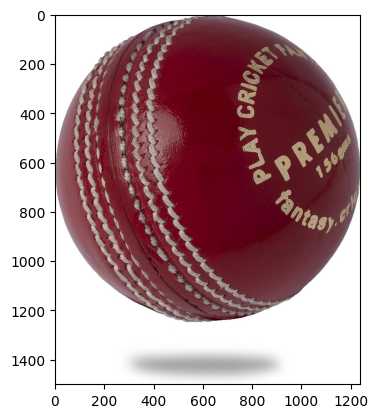

The predicted image is: Cricket ball


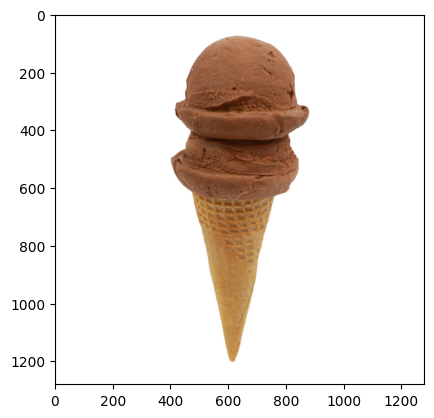

The predicted image is: Ice cream cone
Exiting...


In [11]:

model=pickle.load(open('img_model.p','rb'))

def classify_image(url):
    img = imread(url)
    plt.imshow(img)
    plt.show()

    img_resize = resize(img, (150, 150, 3))

    l = [img_resize.flatten()]

    probability = model.predict_proba(l)

    # for ind, val in enumerate(Categories):
    #     print(f'{val} = {probability[0][ind] * 100}%')
 
    print("The predicted image is:", Categories[model.predict(l)[0]])

while True:

    url = input("Enter URL of Image only of Cars, Criket ball ,Ice cream cone (or type 'exit' to quit): ")

    if url.lower() == 'exit':
        print("Exiting...")
        break
    classify_image(url)
